In [71]:
import requests
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [72]:
pl_players = pd.read_csv("../data/processed/fbref/ENG-Premier League/2024-2025/player_match/passing.csv")
player_seasons = pd.read_csv("../data/processed/fbref/ENG-Premier League/2024-2025/player_season/defense.csv")

match_df = pd.DataFrame(pl_players)
season_df = pd.DataFrame(player_seasons)


blocks = player_seasons["blocks"]
tkl_plus_int = player_seasons["tkl_int"]
clearances = player_seasons["clr"]

defenders = player_seasons[player_seasons["position"] == "DEF"]
goalkeeper = player_seasons[player_seasons["position"] == "GK"]
midfielders = player_seasons[player_seasons["position"] == "MID"]
forwards = player_seasons[player_seasons["position"] == "FWD"]



In [73]:
#number of empty rows per column
empty_rows = pl_players.isnull().sum()
row_types = pl_players.dtypes


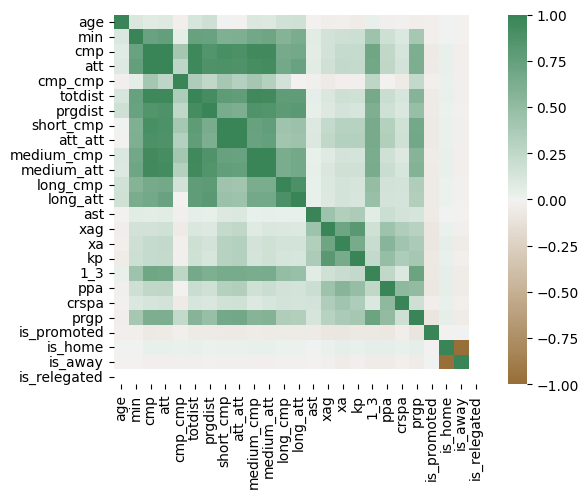

In [74]:
df = match_df.copy()
df = df.drop(columns=["season", "jersey_number"])
def_matrix = df.corr(numeric_only=True, method='spearman')  # pandas ≥1.5

axis_corr = sns.heatmap(
def_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [75]:

#Defensive contributions points by position
# Defensive contributions points by position for each player per match
if "player" in defenders.columns:
    defenders = defenders.groupby("player").agg({
        "blocks": "sum",
        "tkl_int": "sum",
        "clr": "sum",
        "team": "first"
    }).reset_index()
    defenders["defensive_contributions"] = defenders["blocks"] + defenders["tkl_int"] + defenders["clr"]
    defenders["defensive_contributions_points"] = (defenders["defensive_contributions"] // 10) * 2  # Assuming 2 points per 10 defensive contributions

display(defenders.sort_values(by="defensive_contributions_points", ascending=False).head(10))

,player,blocks,tkl_int,clr,team,defensive_contributions,defensive_contributions_points
137,Murillo,69,89,249,NFO,407,80
71,James Tarkowski,57,105,213,EVE,375,74
131,Maxence Lacroix,48,122,207,CRY,377,74
141,Nathan Collins,77,74,226,BRE,377,74
38,Dara O'Shea,62,82,225,IPS,369,72
130,Max Kilman,58,77,212,WHU,347,68
9,Antonee Robinson,43,157,133,FUL,333,66
147,Nikola Milenković,41,78,209,NFO,328,64
39,Dean Huijsen,40,87,198,BOU,325,64
72,Jan Bednarek,47,92,190,SOU,329,64


In [76]:
# Defensive contributions points by position for each player per match
if "player" in midfielders.columns:
    midfielders = midfielders.groupby("player").agg({
        "blocks": "sum",
        "tkl_int": "sum",
        "clr": "sum"
    }).reset_index()
    midfielders["defensive_contributions"] = midfielders["blocks"] + midfielders["tkl_int"] + midfielders["clr"]
    midfielders["defensive_contributions_points"] = (midfielders["defensive_contributions"] // 10) * 2  # Assuming 2 points per 10 defensive contributions

display(midfielders.sort_values(by="defensive_contributions_points", ascending=False).head(10))

,player,blocks,tkl_int,clr,defensive_contributions,defensive_contributions_points
121,Moisés Caicedo,49,163,60,272,54
63,Idrissa Gana Gueye,48,181,36,265,52
31,Christian Nørgaard,52,128,70,250,50
46,Elliot Anderson,48,123,76,247,48
159,Wilfred Ndidi,47,116,80,243,48
96,Lewis Cook,30,122,70,222,44
140,Ryan Gravenberch,35,129,59,223,44
23,Carlos Baleba,47,125,44,216,42
87,João Gomes,42,141,33,216,42
150,Thomas Partey,29,124,49,202,40


In [77]:
# Defensive contributions points by position for each player per match
if "player" in forwards.columns:
    forwards = forwards.groupby("player").agg({
        "blocks": "sum",
        "tkl_int": "sum",
        "clr": "sum",
        "team": "first"
    }).reset_index()
    forwards["defensive_contributions"] = forwards["blocks"] + forwards["tkl_int"] + forwards["clr"]
    forwards["defensive_contributions_points"] = (forwards["defensive_contributions"] // 10) * 2  # Assuming 2 points per 10 defensive contributions

display(forwards.sort_values(by="defensive_contributions_points", ascending=False).head(10))

,player,blocks,tkl_int,clr,team,defensive_contributions,defensive_contributions_points
9,Antoine Semenyo,67,66,39,BOU,172,34
15,Bryan Mbeumo,26,63,55,BRE,144,28
29,Dango Ouattara,36,46,51,BOU,133,26
56,Iliman Ndiaye,30,73,24,EVE,127,24
47,Facundo Buonanotte,34,65,14,LEI,113,22
142,Yankuba Minteh,22,59,31,BHA,112,22
4,Alex Iwobi,26,58,29,FUL,113,22
80,Kaoru Mitoma,48,59,10,BHA,117,22
66,Jarrod Bowen,22,57,25,WHU,104,20
60,Jacob Murphy,31,41,35,NEW,107,20


In [78]:
import secrets
new_id = secrets.token_hex(4)  # e.g. "5ff4ab71"


print(new_id)

b297db6b


In [79]:
salah_df = pl_players[pl_players["player"] == "Mohamed Salah"]

positions = salah_df["pos"].unique()
values = salah_df["pos"].value_counts()
print("Positions for Mohamed Salah:" + str(positions))
print("Value counts for positions of Mohamed Salah:" + str(values))

Positions for Mohamed Salah:['RW' 'RW,FW' 'RW,AM' 'AM' 'RW,WB' 'RW,RM']
Value counts for positions of Mohamed Salah:pos
RW       33
RW,FW     1
RW,AM     1
AM        1
RW,WB     1
RW,RM     1
Name: count, dtype: int64


In [80]:
minutes = pd.read_csv("../data/models/expected_minutes/v8/minutes_predictions.csv")
player_form = pd.read_csv("../data/processed/features/v9/2024-2025/players_form.csv")

minutes_df = pd.DataFrame(minutes)
form_df = pd.DataFrame(player_form)

In [81]:
print(minutes_df.dtypes)
display(form_df.columns)

season                    object
gw_orig                    int64
date_played               object
player_id                 object
team_id                   object
player                    object
pos                       object
venue                     object
minutes                    int64
days_since_last            int64
fdr                      float64
pred_exp_minutes         float64
pred_exp_minutes_med     float64
pred_minutes_q0_1        float64
pred_minutes_q0_5        float64
pred_minutes_q0_9        float64
prob_played60_raw        float64
prob_played60_cal        float64
exp_appearance_points    float64
dtype: object


Index(['player_id', 'player', 'pos', 'fbref_id', 'fpl_id', 'gw_orig',
       'date_played', 'team_id', 'team', 'minutes',
       ...
       'def_blocks_p90_away_roll_z', 'def_tkl_p90_away_roll_z',
       'def_int_p90_away_roll_z', 'def_own_goals_p90_away_roll_z',
       'def_recoveries_p90_away_roll_z', 'def_clr_p90_away_roll_z',
       'gk_saves_p90_away_roll_z', 'gk_sot_against_p90_away_roll_z',
       'pens_pk_won_p90_away_roll_z', 'gk_save_pct_p90_away_roll_z'],
      dtype='object', length=150)

In [82]:
missing = minutes_df["pred_exp_minutes"].isna().sum()

print(missing)

0
